In [113]:
import numpy as np # linear algebra
import pandas as pd 
import tensorflow as tf

In [114]:
import os
for dirname, _, filenames in os.walk('/disha_dataset/archive/CCSN_v2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [115]:
import cv2                  # importing open cv
import numpy as np           # numpy for conversion into numpy array
import pandas as pd             # pandas for csv
import matplotlib.pyplot as plt        # matplot for graphs
%matplotlib inline                
import os                               #for listing directories
import random                             # for shuffling images
import gc

In [116]:
  # Loading  directories
train_As = '../disha_dataset/archive/CCSN_v2/As'

train_Cc = '../disha_dataset/archive/CCSN_v2/Cc'
train_Ci = '../disha_dataset/archive/CCSN_v2/Ci'

train_Ns = '../disha_dataset/archive/CCSN_v2/Ns'


test_dir = '../disha_dataset/archive/CCSN_v2/test'



In [117]:

train_As = ['../disha_dataset/archive/CCSN_v2/As/{}'.format(i) for i in os.listdir(train_As)]
train_Cc = ['../disha_dataset/archive/CCSN_v2/Cc/{}'.format(i) for i in os.listdir(train_Cc)]
train_Ci = ['../disha_dataset/archive/CCSN_v2/Ci/{}'.format(i) for i in os.listdir(train_Ci)]
train_Ns = ['../disha_dataset/archive/CCSN_v2/Ns/{}'.format(i) for i in os.listdir(train_Ns)]
test_imgs = ['../disha_dataset/archive/CCSN_v2/test/{}'.format(i) for i in os.listdir(test_dir)]
train_imgs = train_As+train_Cc+train_Ci+train_Ns # final list of images
random.shuffle(train_imgs) # shuffle images
random.shuffle(test_imgs)

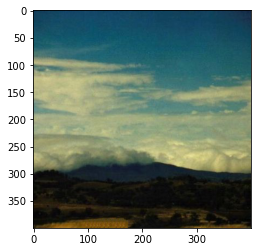

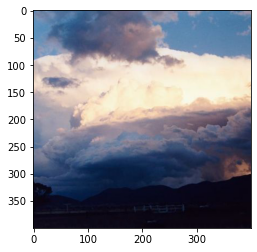

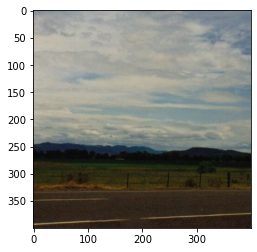

In [118]:
import matplotlib.image as mpimg # matplotlib.image uses pillow convert images to numpy arrays
for ima in train_imgs[0:3]:
        img = mpimg.imread(ima)       # convert the image file stored to arrays
        imgplot = plt.imshow(img)                          # checking if the images are loaded properly
        plt.show()    # 

In [119]:
nrows = 150
ncolumns = 150         # nrows = height of the images , width of the images
channels = 3            # 3 channels for 3 array for red , blue and green pixel values

def process_image(image_list):                # function for process images using cv2 
    X = []  # Empty list for label list and image list
    Y = []
    for image in image_list:
        X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncolumns),interpolation=cv2.INTER_CUBIC))  # cv2.imread is for reading the image file with color according to the specified height and width 
                                                                                                                    #while using cubic interpolation method
        if 'As' in image:
            Y.append(0)                           # labeling each image according from 1 to 10 for different classes of clouds
        elif 'Cc' in image:
            Y.append(1)
        elif 'Ci' in image:
            Y.append(2)
        elif 'Ns' in image:
            Y.append(3)
        
       
     
    return X,Y
            
            

In [120]:
X,Y = process_image(train_imgs)

C:\Users\VISHWA~1\AppData\Local\Temp/ipykernel_8916/2206474967.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5/columns+1,columns,i+1)   # subplot to plot multiple images


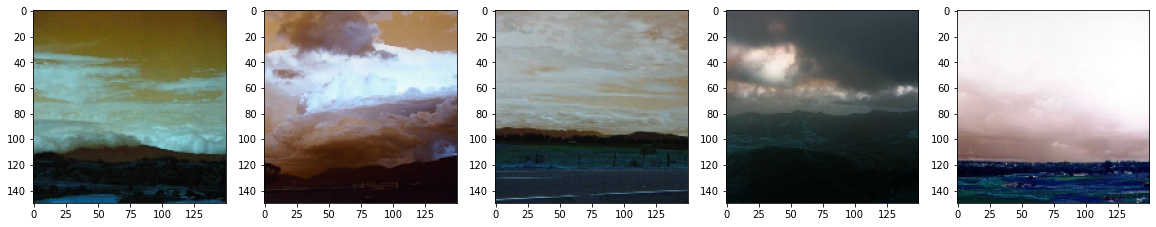

In [121]:
plt.figure(figsize=(20,10))
columns =5 
for i in range(columns):
    plt.subplot(5/columns+1,columns,i+1)   # subplot to plot multiple images
    plt.imshow(X[i])  

C:\Users\vishwa2002\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Label for different clouds')

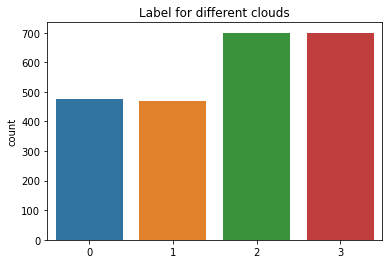

In [122]:
import seaborn as sns                # import seaborn library
del train_imgs                       # del train imgs directory list as its not needed
gc.collect()                           # garbage collection

X = np.array(X)                       # converting to numpy arrays
Y = np.array(Y)
sns.countplot(Y)                      # plot showing distribution of different labels
plt.title("Label for different clouds")

In [123]:
from sklearn.model_selection import train_test_split   # train test split for splitting into training data and validation data 
from keras.utils import to_categorical  # to_categorical for converting list of integers to binary matrix 0's and 1's
X_train, X_val , y_train , y_test = train_test_split(X,Y,test_size=0.10,random_state=2) #random_state for randomising the data being the split

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)  # conversion of both y train and y test into a binary matrix
print(y_train.shape)

(2108, 4)


In [124]:
del X
del Y                           # X,Y are deleted as its no longer needed and garbage is collected
gc.collect()
ntrain = len(X_train)
nval = len(X_val)               #length of X_train and X_val is collected
batch_size = 8 

In [125]:
from keras import layers                              #layers in keras performs calculation and send it to next layers
from keras import models                            # models class defines the way in which model is going to be built.
from keras import optimizers                        # contains algorithms that determines the step in which the neural network after each layer takes in weight to move towards solution
from keras.preprocessing.image import ImageDataGenerator # ImageDataGenerator augments / performs the incoming data and makes it generalisable.
from tensorflow.keras.utils import img_to_array , load_img

In [126]:
model = models.Sequential()                                                         #Sequential API for linear stacking model
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))            #VGG net architechture (Increasing filter size for each layer)
model.add(layers.MaxPooling2D((2,2)))                                                       # Input layer takes 3,3 size window with output size of 32 and input shape of the image
model.add(layers.Conv2D(64,(3,3),activation='relu'))# activation function rectified linear unit
model.add(layers.MaxPooling2D((2,2)))                # Max pooling reduces the parameters , computational load (2,2) reduces chances of over fitting
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())          # flattens the neural network model          
model.add(layers.Dropout(0.5))                    # Dropout is for regularisation drops 50% of neurons to reduce overfitting
#model.add(layers.Dense(256,activation='relu',input_shape=(150,150,3)))
model.add(layers.Dense(512,activation='relu')) # Dense calculates the final computation based on the model returned by flatten using relu
model.add(layers.Dense(4,activation='softmax'))

In [127]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [128]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale=1./255) # data augmentation converts pixels to range of 0,1 normalisation of the data 
#image will be rescaled based on the features , pixels having mean of 0 and SD of 1
# for val image is not augmented just normalised

In [129]:
train_generator = train_datagen.flow(X_train,y_train,batch_size=batch_size) #.flow takes the data and creates batches of augmented data
val_generator = val_datagen.flow(X_val,y_test,batch_size=batch_size)

In [130]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [131]:
history = model.fit(train_generator,steps_per_epoch= ntrain//batch_size,epochs=40,validation_data=val_generator,validation_steps=nval//batch_size)

Epoch 1/40
263/263 [==============================] - 190s 713ms/step - loss: 1.3696 - accuracy: 0.3186 - val_loss: 1.3753 - val_accuracy: 0.3578
Epoch 2/40
263/263 [==============================] - 81s 307ms/step - loss: 1.3457 - accuracy: 0.3186 - val_loss: 1.3390 - val_accuracy: 0.3707
Epoch 3/40
263/263 [==============================] - 81s 308ms/step - loss: 1.3320 - accuracy: 0.3495 - val_loss: 1.3790 - val_accuracy: 0.3017
Epoch 4/40
263/263 [==============================] - 82s 310ms/step - loss: 1.3293 - accuracy: 0.3429 - val_loss: 1.3364 - val_accuracy: 0.3233
Epoch 5/40
263/263 [==============================] - 90s 341ms/step - loss: 1.3455 - accuracy: 0.3410 - val_loss: 1.3567 - val_accuracy: 0.3017
Epoch 6/40
263/263 [==============================] - 92s 349ms/step - loss: 1.3257 - accuracy: 0.3529 - val_loss: 1.3837 - val_accuracy: 0.3491
Epoch 7/40
263/263 [==============================] - 85s 322ms/step - loss: 1.3204 - accuracy: 0.3629 - val_loss: 1.3412 - val_a

In [132]:
model.save_weights('model_weights.h5') # saves the model weights
model.save('model_keras.h5')

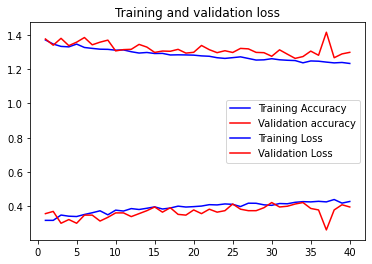

In [133]:
acc = history.history['accuracy']
loss = history.history['loss']                  # recording training parameters and checking for overfitting 
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [134]:
X_test , y_test = process_image(test_imgs)
x= np.array(X_test)
print(x.shape)                          # Testing data ( unseen)
test_datagen = ImageDataGenerator(rescale=1./255)# normalising the data 

(184, 150, 150, 3)


1/1 [==============================] - 0s 58ms/step


C:\Users\VISHWA~1\AppData\Local\Temp/ipykernel_8916/2657778835.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5/columns+1  , columns , i+1)


1/1 [==============================] - 0s 30ms/step


ValueError: num must be 1 <= num <= 10, not 11

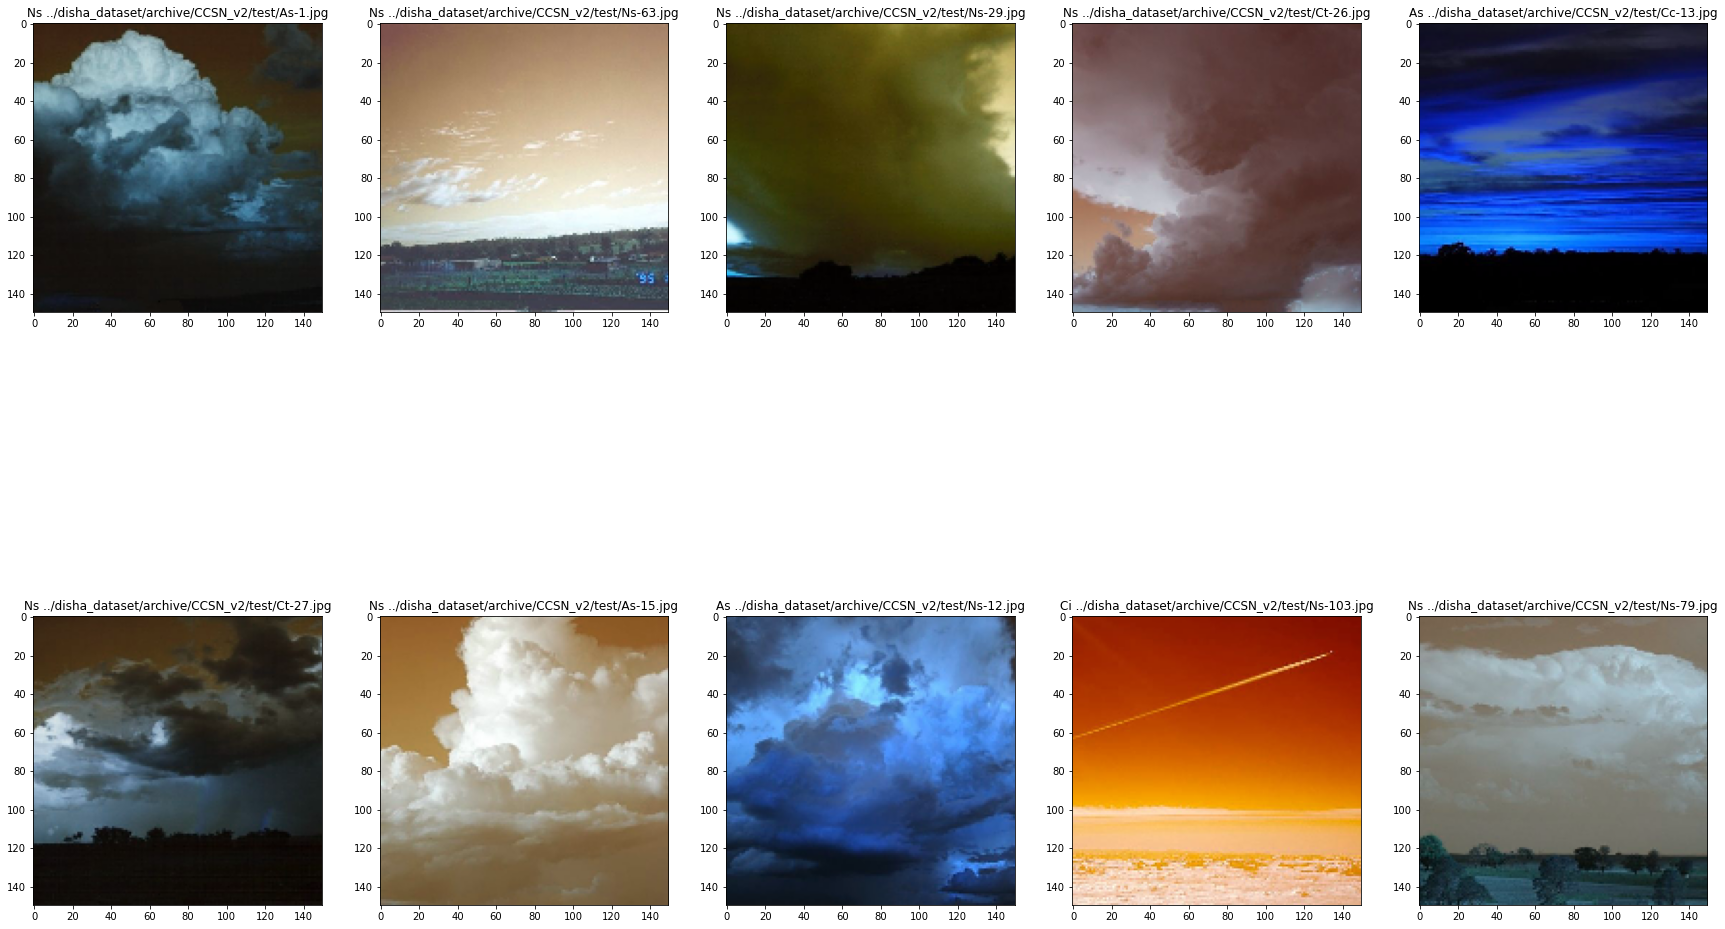

In [138]:
i =0 
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x,batch_size=1,shuffle=True):                   #predicting classes and appending labels
    pred = np.argmax(model.predict(batch), axis=-1)
    
    if pred==0:
        text_labels.append('As')
    elif pred==1:
        text_labels.append("Cc")
    elif pred==2:
        text_labels.append("Ci")
    elif pred==3:
        text_labels.append("Ns")
    plt.subplot(5/columns+1  , columns , i+1)
    plt.title(text_labels[i]+" "+test_imgs[i])
    imgplot = plt.imshow(batch[0])
    i +=1                                            
    if i % x.shape[0]==0:
        break
plt.show()

In [140]:
   from keras.models import load_model
   model.save('model_2.h5')
   model_final = load_model('model_2.h5')


In [ ]:
history.history['accuracy']